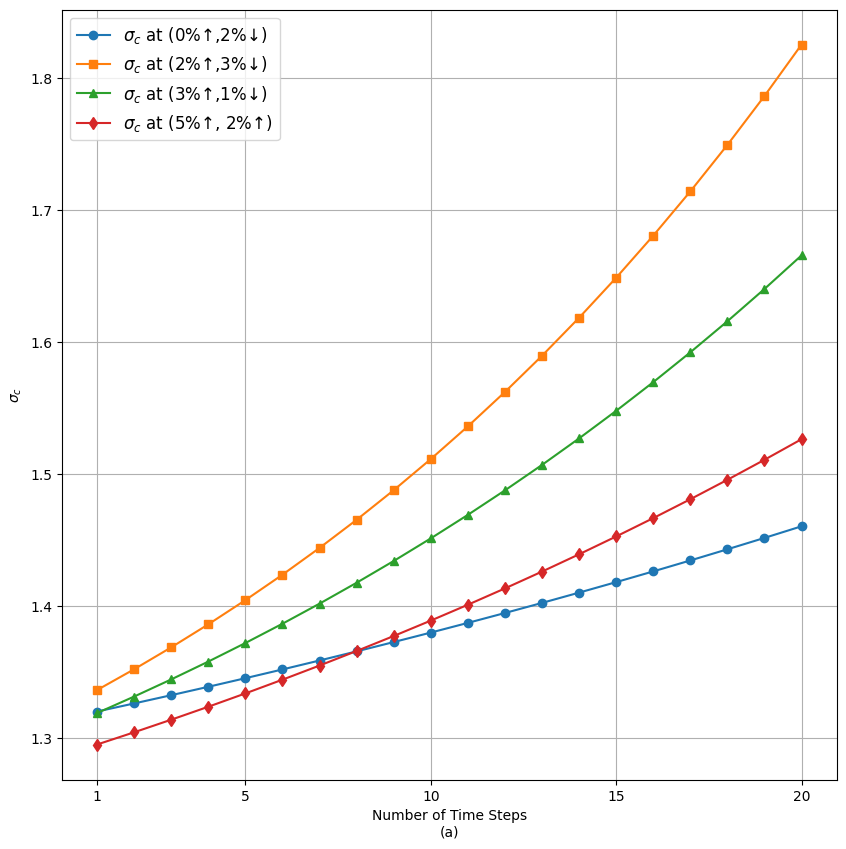

In [15]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np


#for sigma_customer=(n_kt/n_t)*(math.exp((n_t_1-n_t)/(n_t)))
timestep=np.arange(0,20) #number of time steps(rounds)=(year*month)/(period_in_months)

N=1000 
N1=300
custlist33 =[]  #n_t
custlist53 =[]
custlist55 =[]
custlist22 =[]

custlist33.append(N)
custlist53.append(N)
custlist55.append(N)
custlist22.append(N)

valList33 =[]  
valList53 =[]
valList55 =[]
valList22 =[]

demand_33=N1  #n_kt
demand_53=N1
demand_55=N1
demand_22=N1


for i in timestep:
    demand_33 +=round(int(demand_33)*0) #customer demand for 5G increased by 0%
    demand_53 +=round(int(demand_53)*0.02) #customer demand for 5G increased by 2%
    demand_55 += round(int(demand_55) * 0.03) #customer demand for 5G increased by 3%
    demand_22 += round(int(demand_22) * 0.05) #customer demand for 5G increased by 1%

    next_cust33=round(int(custlist33[i])*0.98)  #next_cust=n_t_plus_1, total customer decreases by 2%
    next_cust53=round(int(custlist53[i])*0.97) #total customer decreases by 3%
    next_cust55=round(int(custlist55[i])*0.99) #total customer decreases by 5%
    next_cust22=round(int(custlist22[i])*1.02) #total customer increases by 2%

    sigma_c33 = (demand_33/custlist33[i]) + np.exp((custlist33[i]-next_cust33)/custlist33[i])
    sigma_c53 = (demand_53 / custlist53[i]) + np.exp((custlist53[i] - next_cust53) / custlist53[i])
    sigma_c55 = (demand_55 / custlist55[i]) + np.exp((custlist55[i] - next_cust55) / custlist55[i])
    sigma_c22 = (demand_22 / custlist22[i] ) + np.exp((custlist22[i] - next_cust22) / custlist22[i])

    valList33.append(sigma_c33)
    valList53.append(sigma_c53)
    valList55.append(sigma_c55)
    valList22.append(sigma_c22)

    custlist33.append(next_cust33)
    custlist53.append(next_cust53)
    custlist55.append(next_cust55)
    custlist22.append(next_cust22)

custlist33.pop()
custlist53.pop()
custlist55.pop()
custlist22.pop()

plt.figure(figsize=(10, 10))
# plt.subplot(1, 2, 1)
plt.plot(timestep+1, valList33, marker='o', label='$\sigma_c$ at (0%$\u2191$,2%$\u2193$)')
plt.plot(timestep+1, valList53, marker='s', label='$\sigma_c$ at (2%$\u2191$,3%$\u2193$)')
plt.plot(timestep+1, valList55, marker='^', label='$\sigma_c$ at (3%$\u2191$,1%$\u2193$)')
plt.plot(timestep+1, valList22, marker='d', label='$\sigma_c$ at (5%$\u2191$, 2%$\u2191$)')
plt.xlabel('Number of Time Steps\n(a)')
plt.ylabel(ylabel='$\sigma_c$')
plt.xticks([1, 5, 10,15,20])

# plt.xlim(-1,20)
font_props = fm.FontProperties(size=12)  # Adjust the size value as desired
plt.legend(prop=font_props)
plt.grid(True)





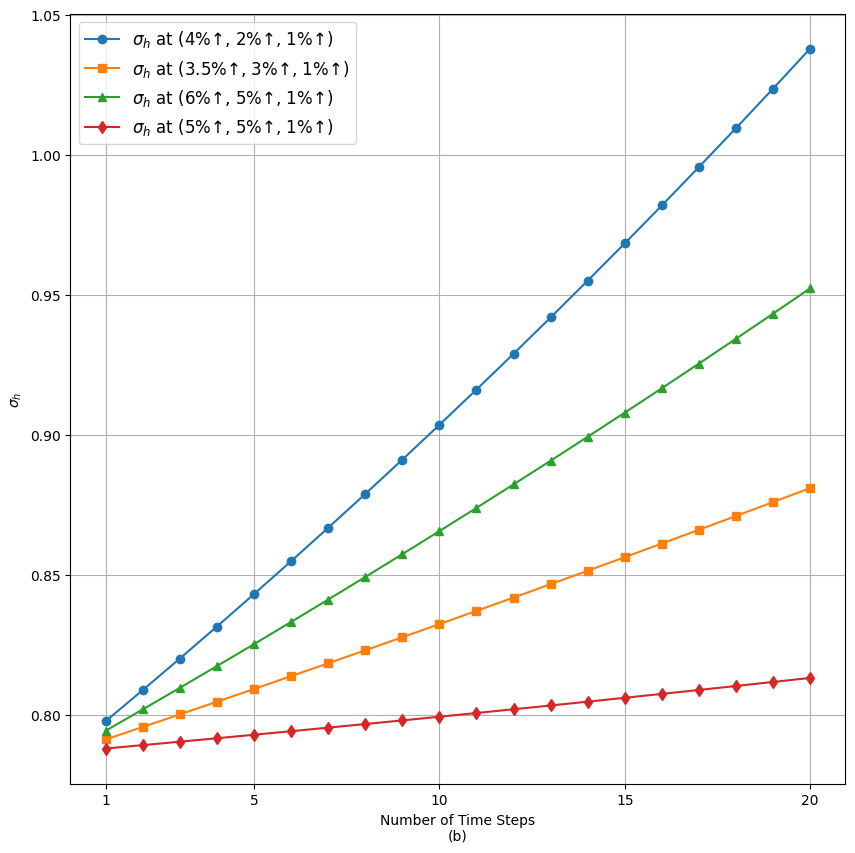

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Time steps
timestep = np.arange(1,21)

# Initial conditions for HR and budget
HR_all = 100

# Scenario 1
HR_5G = 12
B_t = 30000
B_c = 45000
hrval22 = []

for hr6 in timestep:
    B_t += B_t * 0.04  # available budget increased by 2%
    B_c += B_c * 0.025  # migration cost increased by 0.2%
    HR_5G += HR_5G / 100  # steady increment in 5G capable Human Resource
    valhr = (HR_5G / HR_all) + (B_t / B_c)
    hrval22.append(valhr)

# Scenario 2
HR_5G = 12
B_t = 30000
B_c = 45000
hrval221 = []

for hr6 in timestep:
    B_t += B_t * 0.035  # available budget increased by 3%
    B_c += B_c * 0.03 # migration cost increased by 0.1%
    HR_5G += HR_5G / 100
    valhr = (HR_5G / HR_all) + (B_t / B_c)
    hrval221.append(valhr)

# Scenario 3
HR_5G = 12
B_t = 30000
B_c = 45000
hrval52 = []

for hr6 in timestep:
    B_t += B_t * 0.06  # available budget increased by 2%
    B_c += B_c * 0.05  # migration cost increased by 5%
    HR_5G += HR_5G / 100
    valhr = (HR_5G / HR_all) + (B_t / B_c)
    hrval52.append(valhr)

# Scenario 4
HR_5G = 12
B_t = 30000
B_c = 45000
hrval521 = []

for hr6 in timestep:
    B_t += B_t * 0.05  # available budget increased by 3%
    B_c += B_c * 0.05  # migration cost increased by 5%
    HR_5G += HR_5G / 100
    valhr = (HR_5G / HR_all) + (B_t / B_c)
    hrval521.append(valhr)

# Plotting
plt.figure(figsize=(10, 10))

# Plotting the four scenarios
plt.plot(timestep, hrval22, marker='o', label='$\sigma_{h}$ at (4%$\u2191$, 2%$\u2191$, 1%$\u2191$)')
plt.plot(timestep, hrval221, marker='s', label='$\sigma_{h}$ at (3.5%$\u2191$, 3%$\u2191$, 1%$\u2191$)')
plt.plot(timestep, hrval52, marker='^', label='$\sigma_{h}$ at (6%$\u2191$, 5%$\u2191$, 1%$\u2191$)')
plt.plot(timestep, hrval521, marker='d', label='$\sigma_{h}$ at (5%$\u2191$, 5%$\u2191$, 1%$\u2191$)')

plt.xlabel('Number of Time Steps\n(b)')
plt.ylabel('$\sigma_{h}$')
plt.xticks([1, 5, 10,15,20])

font_props = fm.FontProperties(size=12)  # Adjust the size value as desired
plt.legend(prop=font_props)
plt.grid(True)
plt.show()


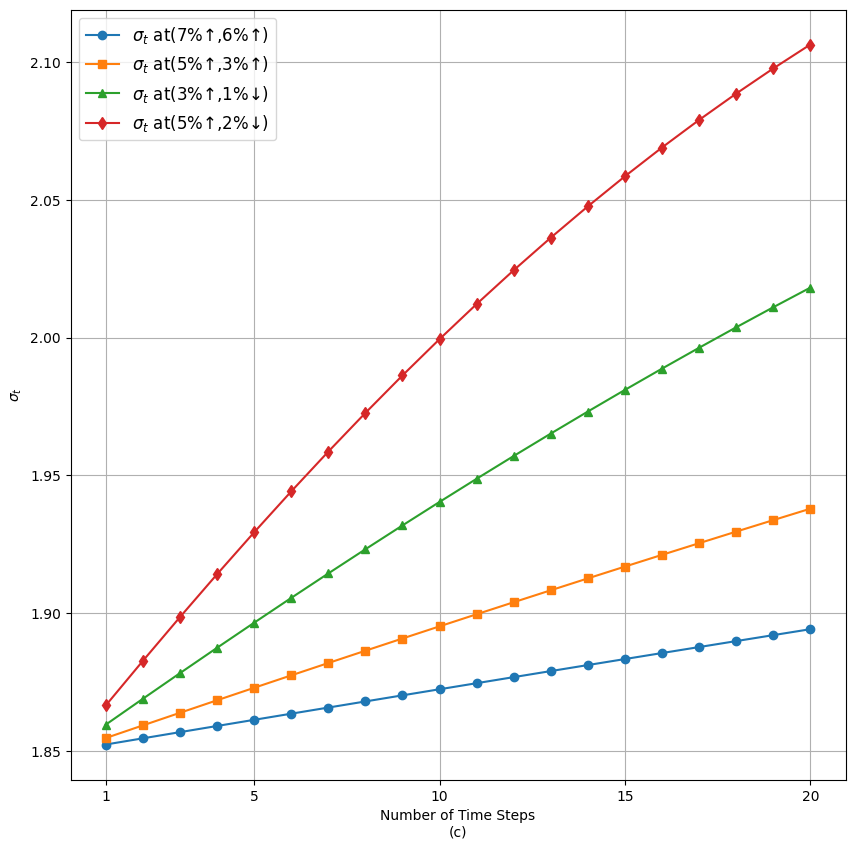

In [17]:
#for sigma_t=(P_area/C_area)*((BW_h)/(BW_h+BW_l))
##1
BW_h=600 #in GHz
BW_l=400

P_area=125 #projected coverage area in meters squared
C_area=100 #cuurent coverage area in meters squared
timestep=np.arange(1,21)

BW_area_1=[]
for hr6 in timestep:
    BW_h+=BW_h*0.07 #5G Bandwidth increased by 10%
    BW_l+=BW_l*0.06 #4G bandwidth increased by 0.2%
    # P_area+=P_area*0.01 #increment in projected area by 1%
    # C_area+=C_area*0.1 #increment in coverage area by 10%
    #val=(P_area/C_area)*((BW_h)/(BW_h+BW_l)) #this gave exponentially decreasing type of curve 
    val=(P_area/C_area)+((BW_h)/(BW_l+BW_h))  #this gave rising curve, need to adjust increment rates for better graphs
    BW_area_1.append(val)

# plt.subplot(1, 3, 3)

##2
BW_h=600 #in GHz
BW_l=400

P_area=125 #projected coverage area in meters squared
C_area=100 #cuurent coverage area in meters squared


BW_area_2=[]
for hr6 in timestep:
    BW_h+=BW_h*0.05
    BW_l+=BW_l*0.03 
    # P_area+=P_area*0.04 
    # C_area+=C_area*0.15 
    val=(P_area/C_area) + ((BW_h)/(BW_l+BW_h)) 
    BW_area_2.append(val)

# plt.subplot(1, 3, 3)

##3
BW_h=600 #in GHz
BW_l=400

P_area=125 #projected coverage area in meters squared
C_area=100 #cuurent coverage area in meters squared


BW_area_3=[]
for hr6 in timestep:
    BW_h+=BW_h*0.03
    BW_l+=BW_l*-0.01
    # P_area+=P_area*0.03 
    # C_area+=C_area*0.25 
    val=(P_area/C_area) + ((BW_h)/(BW_l+BW_h)) 
    BW_area_3.append(val)
font_props = fm.FontProperties(size=12)  # Adjust the size value as desired

# plt.subplot(1, 3, 3)

##4
BW_h=600 #in GHz
BW_l=400

P_area=125 #projected coverage area in meters squared
C_area=100 #cuurent coverage area in meters squared


BW_area_4=[]
for hr6 in timestep:
    BW_h+=BW_h*0.05
    BW_l+=BW_l*-0.02 
    # P_area+=P_area*0. 
    # C_area+=C_area*0.1 
    val=(P_area/C_area) + ((BW_h)/(BW_l+BW_h)) 
    BW_area_4.append(val)

# plt.subplot(1, 3, 3)
plt.figure(figsize=(10,10))
plt.plot(timestep, BW_area_1, marker='o', label='$\sigma_{t}$ at(7%$\u2191$,6%$\u2191$)')
plt.plot(timestep, BW_area_2, marker='s', label='$\sigma_{t}$ at(5%$\u2191$,3%$\u2191$)') #will update legend values later
plt.plot(timestep, BW_area_3, marker='^', label='$\sigma_{t}$ at(3%$\u2191$,1%$\u2193$)')
plt.plot(timestep, BW_area_4, marker='d', label='$\sigma_{t}$ at(5%$\u2191$,2%$\u2193$)')

plt.xlabel('Number of Time Steps\n(c)')
plt.ylabel(ylabel='$\sigma_t$')
# plt.xlim(-1,20)
plt.xticks([1, 5, 10,15,20])


font_props = fm.FontProperties(size=12)  # Adjust the size value as desired
plt.legend(prop=font_props)
plt.grid(True)
plt.show()

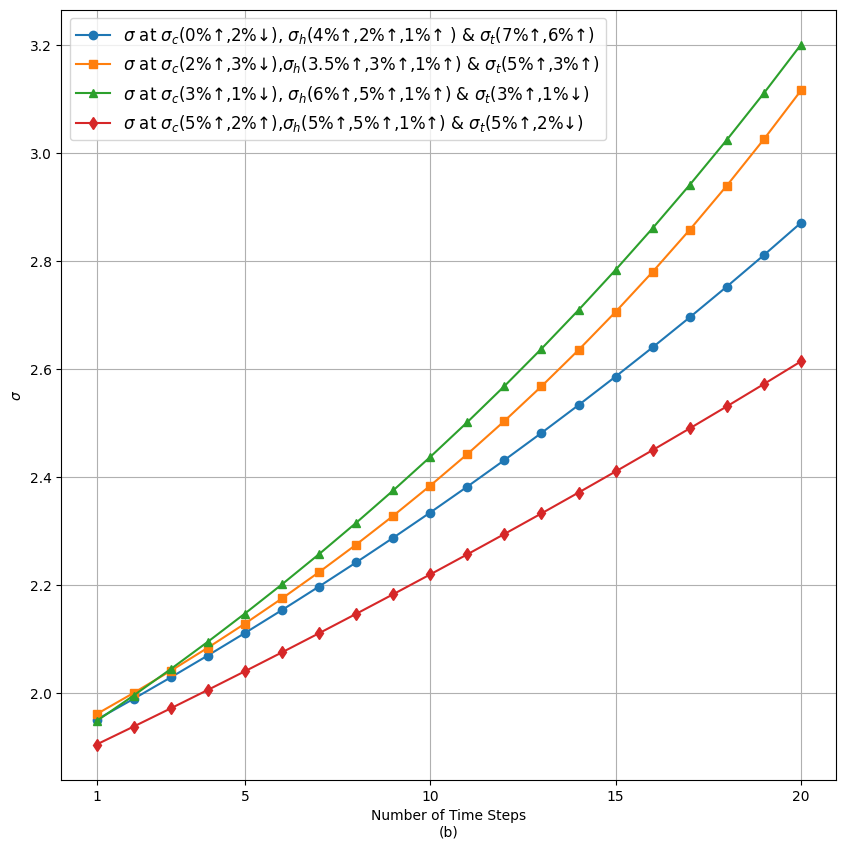

In [18]:

timestep=np.arange(0,20)

sigma_m_1 = []
sigma_m_2 = []
sigma_m_3 = []
sigma_m_4 = []
for i in timestep:
    sigma_m_1.append(valList33[i] * hrval22[i] * BW_area_1[i])
    sigma_m_2.append(valList53[i] * hrval221[i] * BW_area_2[i])
    sigma_m_3.append(valList55[i] * hrval52[i] * BW_area_3[i])
    sigma_m_4.append(valList22[i] * hrval521[i] * BW_area_4[i])
plt.figure(figsize=(10,10))

plt.plot(timestep+1, sigma_m_1, marker='o', 
         label='$\sigma$ at $\sigma_c$(0%$\u2191$,2%$\u2193$), $\sigma_h$(4%$\u2191$,2%$\u2191$,1%$\u2191$ ) & $\sigma_t$(7%$\u2191$,6%$\u2191$)')
plt.plot(timestep+1, sigma_m_2, marker='s',
         label='$\sigma$ at $\sigma_c$(2%$\u2191$,3%$\u2193$),$\sigma_h$(3.5%$\u2191$,3%$\u2191$,1%$\u2191$) & $\sigma_t$(5%$\u2191$,3%$\u2191$)')
plt.plot(timestep+1, sigma_m_3, marker='^',
         label='$\sigma$ at $\sigma_c$(3%$\u2191$,1%$\u2193$), $\sigma_h$(6%$\u2191$,5%$\u2191$,1%$\u2191$) & $\sigma_t$(3%$\u2191$,1%$\u2193$)')
plt.plot(timestep+1, sigma_m_4, marker='d',
         label='$\sigma$ at $\sigma_c$(5%$\u2191$,2%$\u2191$),$\sigma_h$(5%$\u2191$,5%$\u2191$,1%$\u2191$) & $\sigma_t$(5%$\u2191$,2%$\u2193$)')
plt.xlabel('Number of Time Steps\n(b)')
plt.ylabel('$\sigma$')
plt.xticks([1, 5, 10,15,20])

font_props = fm.FontProperties(size=12)  
plt.legend(prop=font_props)
plt.grid(True)
plt.show()


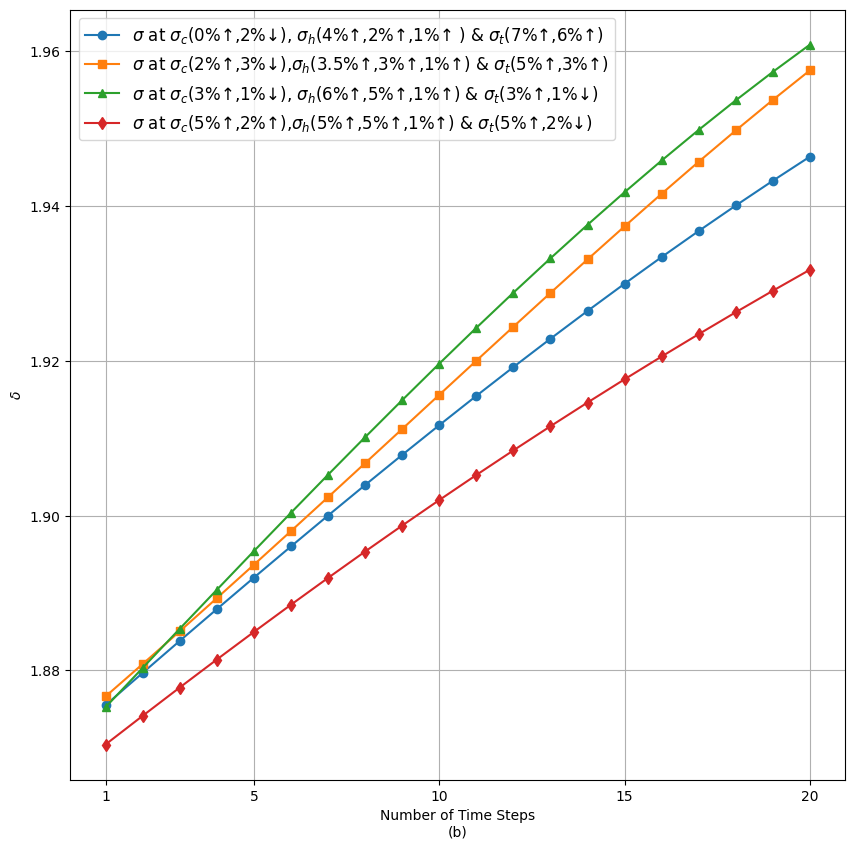

In [19]:
#for fitness multiplier delta. Needs further optimization of values of sigma_m 
delta_1=[]
delta_2=[]
delta_3=[]
delta_4=[]

timestep=np.arange(0,20)

for i in timestep:
    delta_1.append(1+1/(1+np.exp(-sigma_m_1[i])))   #need to optimize sigma_m for better delta graph, also probably need to normalize delta to restrict #values between 0 and 1
    delta_2.append(1+1/(1+np.exp(-sigma_m_2[i])))
    delta_3.append(1+1/(1+np.exp(-sigma_m_3[i])))
    delta_4.append(1+1/(1+np.exp(-sigma_m_4[i])))
    

plt.figure(figsize=(10,10))
plt.plot(timestep+1, delta_1, marker='o', 
         label='$\sigma$ at $\sigma_c$(0%$\u2191$,2%$\u2193$), $\sigma_h$(4%$\u2191$,2%$\u2191$,1%$\u2191$ ) & $\sigma_t$(7%$\u2191$,6%$\u2191$)')
plt.plot(timestep+1, delta_2, marker='s',
         label='$\sigma$ at $\sigma_c$(2%$\u2191$,3%$\u2193$),$\sigma_h$(3.5%$\u2191$,3%$\u2191$,1%$\u2191$) & $\sigma_t$(5%$\u2191$,3%$\u2191$)')
plt.plot(timestep+1, delta_3, marker='^',
         label='$\sigma$ at $\sigma_c$(3%$\u2191$,1%$\u2193$), $\sigma_h$(6%$\u2191$,5%$\u2191$,1%$\u2191$) & $\sigma_t$(3%$\u2191$,1%$\u2193$)')
plt.plot(timestep+1, delta_4, marker='d',
         label='$\sigma$ at $\sigma_c$(5%$\u2191$,2%$\u2191$),$\sigma_h$(5%$\u2191$,5%$\u2191$,1%$\u2191$) & $\sigma_t$(5%$\u2191$,2%$\u2193$)')
plt.xlabel('Number of Time Steps\n(b)')
plt.ylabel('$\delta$')
plt.xticks([1, 5, 10,15,20])

font_props = fm.FontProperties(size=12)  
plt.legend(prop=font_props)
plt.grid(True)
plt.show()

In [20]:
# utility graph
#we haven't calculated utility